# Plots for the Report

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Strong Scaling

## Dataset 1
Dataset: 2, 4, 8, 16, 32, 64, 128 MB

### Sequential

In [2]:
# Sequential times for 5 runs (file: outputs/output_seq_49758.txt)
seq_times = [14.9707, 14.1369, 14.1449, 14.1483, 14.0993]
seq_avg = np.mean(seq_times)

print(seq_avg)

14.30002


### FastFlow

In [2]:
# COMPRESSION 

def parse_data(file_content):
    # Initialize an empty dictionary to store data for each combination of l and r
    data = {}

    # Process each line in the file
    for line in file_content:
        # Only care about 'Compression' lines
        if line.startswith("Compression"):
            # Split the line into components
            parts = line.split(",")
            l = int(parts[1])
            r = int(parts[2])
            time = float(parts[3])

            # Add data to the dictionary
            if l not in data:
                data[l] = {}
            if r not in data[l]:
                data[l][r] = []
            data[l][r].append(time)
    
    return data

# Function to calculate the average of each combination of l and r
def average_data(data):
    avg_data = {}
    for l in data:
        avg_data[l] = {}
        for r in data[l]:
            avg_data[l][r] = np.mean(data[l][r])
    return avg_data

# Define the function to plot the data
def plot_compression_data(avg_data):
    plt.figure(figsize=(10, 6))

    # Plot the average compression time for each value of l
    for l in avg_data:
        r_values = sorted(avg_data[l].keys())  # Get sorted r values
        avg_times = [avg_data[l][r] for r in r_values]
        plt.plot(r_values, avg_times, label=f"Lw = {l}")

    # Add the sequential time to the plot
    plt.axhline(y=seq_avg, color='r', linestyle='--', label="Sequential")

    # Customize the plot
    plt.xlabel("Right Workers")
    plt.ylabel("Compression Time (seconds)")
    plt.title("Average Compression Time over 5 runs")
    plt.legend(title="Left Workers")
    # Light grid
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)

    # Show the plot
    plt.show()

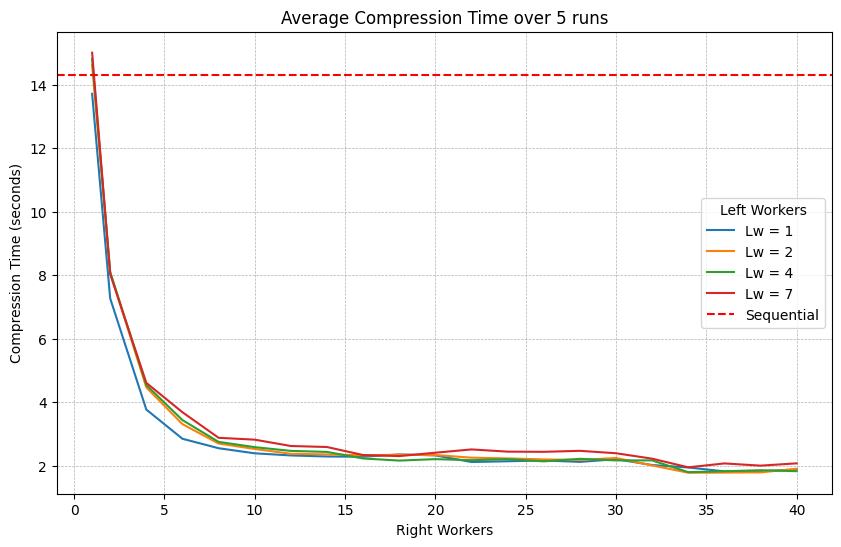

In [28]:
# Consider outputs/output_ff_49770.txt and outputs/output_ff_49794.txt (merge them)
file_content = []
file1 = open("outputs/output_ff_49770.txt", "r")
file2 = open("outputs/output_ff_49794.txt", "r")
file_content += file1.readlines()
file_content += file2.readlines()

# Parsing the data
data = parse_data(file_content)

# Averaging the data
avg_data = average_data(data)

# Plot the data
plot_compression_data(avg_data)

In [14]:
# Print the config for which the time is minimum
min_time = float('inf')
min_l = 0
min_r = 0
for l in avg_data:
    for r in avg_data[l]:
        if avg_data[l][r] < min_time:
            min_time = avg_data[l][r]
            min_l = l
            min_r = r
print(f"Minimum time: {min_time} for l={min_l}, r={min_r}")

Minimum time: 1.786146 for l=2, r=34


# Weak Scaling

## Dataset 
Dataset: 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200 MB

### Sequential

In [3]:
# COMPRESSION

def parse_data_seq(file_content):
    # Initialize an empty dictionary to store the data for each file
    data = {}

    # Process each line in the file
    for line in file_content:
        # Only care about 'Compression' lines
        if line.startswith("Compression"):
            # Split the line into components
            parts = line.split(",")
            size = int(parts[1])
            time = float(parts[2])

            # Add data to the dictionary
            if size not in data:
                data[size] = []
            # add value time to the dictionary under the key size
            data[size].append(time)
    
    return data

# Function to calculate the average of each file
def average_data_seq(data):
    avg_data = {}
    for size in data:
        avg_data[size] = {}
        for time in data[size]:
            avg_data[size] = np.mean(data[size])
    return avg_data

In [4]:
file_content = open("outputs/output_seq_weak_49804.txt", "r").readlines()

data = parse_data_seq(file_content)

avg_data_seq = average_data_seq(data)

In [5]:
avg_data_seq

{5: np.float64(0.32659960000000005),
 10: np.float64(0.609179),
 20: np.float64(1.2561819999999997),
 30: np.float64(1.81253),
 40: np.float64(2.434916),
 50: np.float64(3.003432),
 60: np.float64(3.6096000000000004),
 70: np.float64(4.259026),
 80: np.float64(4.8646259999999995),
 90: np.float64(5.597530000000001),
 100: np.float64(6.132464000000001),
 110: np.float64(6.703838),
 120: np.float64(7.19812),
 130: np.float64(7.887770000000001),
 140: np.float64(8.549147999999999),
 150: np.float64(9.46154),
 160: np.float64(9.69102),
 170: np.float64(10.78048),
 180: np.float64(10.81404),
 190: np.float64(11.61306),
 200: np.float64(12.1831)}

### FastFlow

In [15]:
# Define the function to plot the data
def plot_compression_data_weak(avg_data_seq, avg_data):
    plt.figure(figsize=(10, 6))

    # Map avg_data_seq keys to corresponding R-worker keys in avg_data[2]
    seq_keys = sorted(avg_data_seq.keys())
    r_worker_keys = sorted(avg_data[2].keys())  # Actual R-worker keys from avg_data[2]

    # Extract sequential values and map to R-worker
    seq_values = [avg_data_seq[k] for k in seq_keys]
    plt.plot(r_worker_keys, seq_values, label="Sequential", color="blue")

    # Plot avg_data for l=2
    r_values = sorted(avg_data[2].keys())
    avg_times = [avg_data[2][r] for r in r_values]
    plt.plot(r_values, avg_times, label="FastFlow (Lw = 2)", color="orange")

    # Customize the plot
    plt.xlabel("Right Workers")
    plt.ylabel("Compression Time (seconds)")
    plt.title("Average Compression Time over 5 runs")
    plt.legend()

    # Light grid
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)

    # Show the plot
    plt.show()

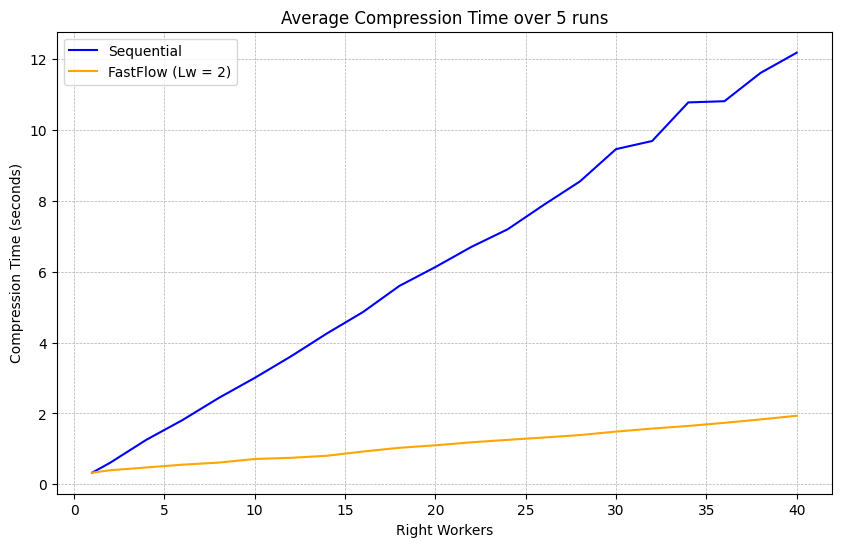

In [16]:
# Consider outputs/output_ff_weak_49797.txt
file_content = open("outputs/output_ff_weak_49797.txt", "r").readlines()

# Parsing the data
data = parse_data(file_content)

# Averaging the data
avg_data = average_data(data)

# Plot the data
plot_compression_data_weak(avg_data_seq, avg_data)